In [1]:
import med_dataloader as med_dl

In [8]:
import shutil

try:
    shutil.rmtree("Test_Dataset_segmentation_patch_TF")
except:
    pass

In [9]:
num_classes = 3

med_dl.generate_dataset(data_path=r"Test_Dataset_segmentation_patch.json",
                        imgA_label="CT",
                        imgB_label="Labels",
                        img_size=256,
                        is_B_categorical=True,
                        num_classes=num_classes,
                        norm_boundsA=None,
                        norm_boundsB=None,
                        use_3D=True,
                        patch_size=100,
                        patch_overlap=0.0
                        )

train_ds, valid_ds, test_ds = med_dl.get_dataset(data_dir=r"Test_Dataset_segmentation_patch_TF",
                                                 percentages=[1,0,0],
                                                 batch_size=1,
                                                 train_augmentation=True,
                                                 random_crop_size=None,
                                                 random_rotate=False,
                                                 random_flip=False,
                                                 )


Caching decoded images in Test_Dataset_segmentation_patch_TF\CT.cache...
24/3
Cached decoded images in Test_Dataset_segmentation_patch_TF\CT.cache.
Caching decoded images in Test_Dataset_segmentation_patch_TF\Labels.cache...
24/3
Cached decoded images in Test_Dataset_segmentation_patch_TF\Labels.cache.


tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


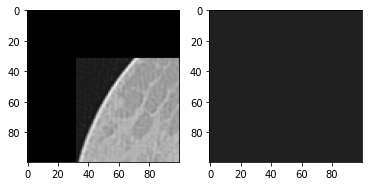

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


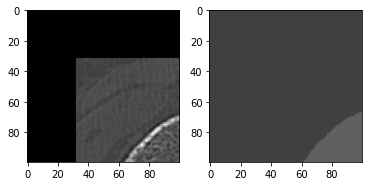

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


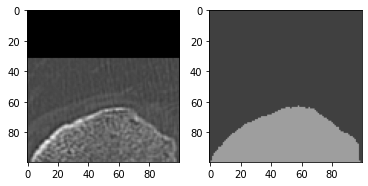

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


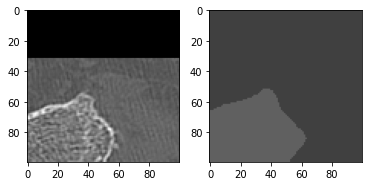

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


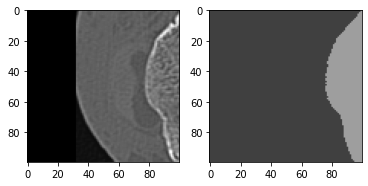

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


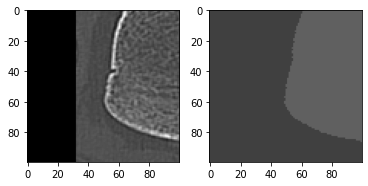

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


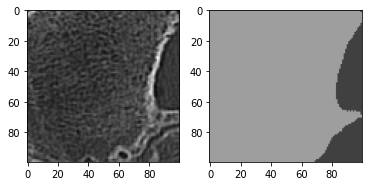

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


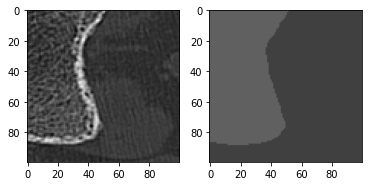

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


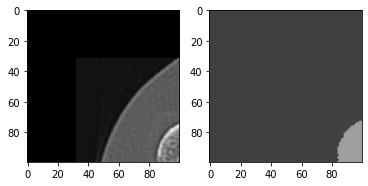

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


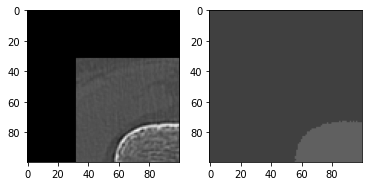

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


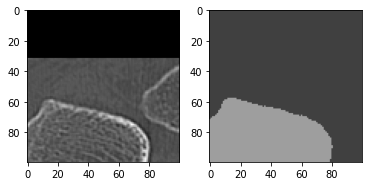

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


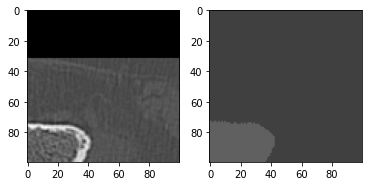

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


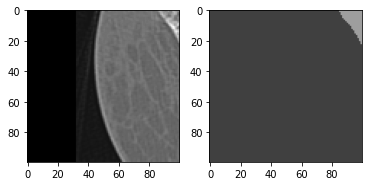

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


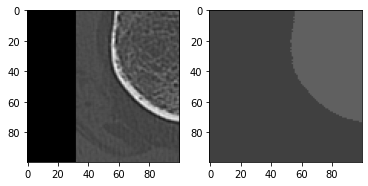

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


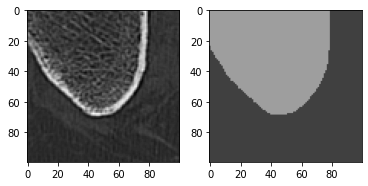

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


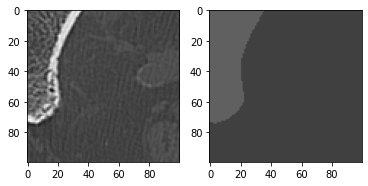

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


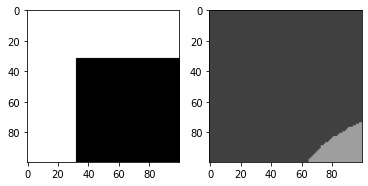

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


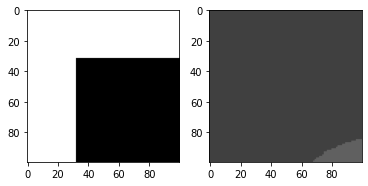

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


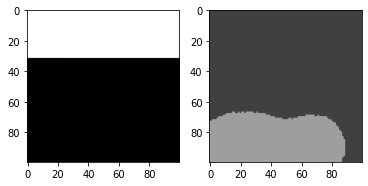

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


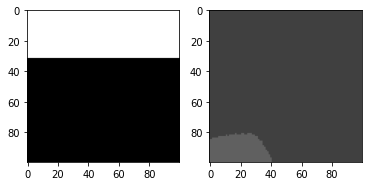

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


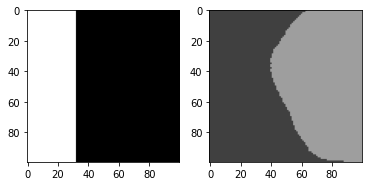

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


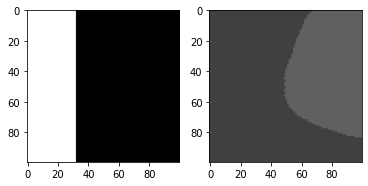

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


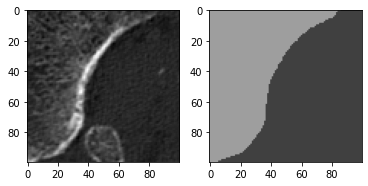

tf.Tensor([100 100 100   1], shape=(4,), dtype=int32)


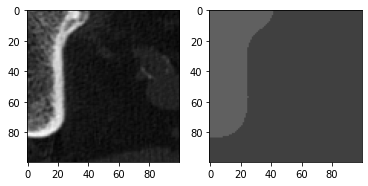

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
slice_index = 80

for batch in train_ds:#.take(3):
#for batch in train_ds.skip(192*0+70).take(30):
    volume_batch, label_batch = batch
    for volume, label in zip(volume_batch, label_batch):
        print(tf.shape(volume))
        plt.subplot(121)
        plt.imshow(volume[:,:,slice_index,0], cmap="gray")
        #plt.imshow(volume[:,:,0], cmap="gray")
        plt.subplot(122)
        for i in range(num_classes):
            plt.imshow(label[:,:,slice_index,i], cmap="gray", alpha=0.5)
            #plt.imshow(label[:,:,i], cmap="gray", alpha=0.5)
        plt.show()
    

In [ ]:
import SimpleITK as sitk
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

path = r"C:\Users\rossi\Programming\python_packages\med_dataloader\examples\Test_Dataset_segmentation_patch\CT"
path = os.path.join(path, "volumeCT_reshape_knee_192_192_192_0001.mha")
img = sitk.GetArrayFromImage(sitk.ReadImage(path))
img = np.transpose(img, axes=(2, 1, 0))
img = tf.convert_to_tensor(img)

img_size = 200

if img_size % 2 != 0:
    img_size += 1

current_size = img.shape
diff = [(img_size - x) // 2 for x in current_size]
pad_amount = [x if x > 0 else 0 for x in diff]
paddings = [[x, x] for x in pad_amount]
img = tf.pad(img, paddings=paddings)

current_size = img.shape
diff = [(img_size - x) // 2 for x in current_size]
crop_begins = [-x if x < 0 else 0 for x in diff]
crop_ends = [img_size for _ in crop_begins]
img = tf.slice(img, crop_begins, crop_ends)
img = tf.expand_dims(img, axis=-1)
img = tf.expand_dims(img, axis=0)
print(tf.shape(img))

plt.imshow(img[0,:,:,15,0], cmap="gray")
plt.show()

patch_size = 92 # patch_shape
overlap_perc = 0.5
overlap=int(patch_size*overlap_perc)
print(overlap)

ksizes = [1, patch_size, patch_size, patch_size, 1]
strides = [1, patch_size-overlap, patch_size-overlap, patch_size-overlap, 1]
img = tf.extract_volume_patches(img, ksizes, strides,  'VALID')
print(tf.shape(img))
img = tf.reshape(img, [-1, patch_size, patch_size, patch_size])
print(tf.shape(img))

for p in range(10):
    print(f"Patch: {p}")
    for i in range(1):
        plt.imshow(img[p, :, :, i], cmap="gray")
        plt.show()


In [ ]:
import SimpleITK as sitk
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

path = r"C:\Users\rossi\Programming\python_packages\med_dataloader\examples\Test_Dataset_segmentation_patch\CT"
path = os.path.join(path, "volumeCT_reshape_knee_192_192_192_0001.mha")
img = sitk.GetArrayFromImage(sitk.ReadImage(path))
img = np.transpose(img, axes=(2, 1, 0))
img = tf.convert_to_tensor(img)

path = r"C:\Users\rossi\Programming\python_packages\med_dataloader\examples\Test_Dataset_segmentation_patch\Labels"
path = os.path.join(path, "volumeLabel_femur_tibia_192_192_192_0001.mha")
lab = sitk.GetArrayFromImage(sitk.ReadImage(path))
lab = np.transpose(lab, axes=(2, 1, 0))
lab = tf.convert_to_tensor(lab)

img_size = 200

if img_size % 2 != 0:
    img_size += 1

current_size = img.shape
diff = [(img_size - x) // 2 for x in current_size]
pad_amount = [x if x > 0 else 0 for x in diff]
paddings = [[x, x] for x in pad_amount]
img = tf.pad(img, paddings=paddings)
lab = tf.pad(lab, paddings=paddings)

current_size = img.shape
diff = [(img_size - x) // 2 for x in current_size]
crop_begins = [-x if x < 0 else 0 for x in diff]
crop_ends = [img_size for _ in crop_begins]
img = tf.slice(img, crop_begins, crop_ends)
img = tf.expand_dims(img, axis=-1)
img = tf.expand_dims(img, axis=0)
print(tf.shape(img))

lab = tf.slice(lab, crop_begins, crop_ends)
lab = tf.expand_dims(lab, axis=-1)
lab = tf.expand_dims(lab, axis=0)
print(tf.shape(lab))

_, axs = plt.subplots(1,2)
axs[0].imshow(img[0,:,:,15,0], cmap="gray")
axs[1].imshow(lab[0,:,:,15,0], cmap="gray")
plt.show()

patch_size = 100 # patch_shape
overlap = 50

ksizes = [1, patch_size, patch_size, patch_size, 1]
strides = [1, patch_size-overlap, patch_size-overlap, patch_size-overlap, 1]
img = tf.extract_volume_patches(img, ksizes, strides,  'VALID')
print(tf.shape(img))
img = tf.reshape(img, [-1, patch_size, patch_size, patch_size])
print(tf.shape(img))

lab = tf.extract_volume_patches(lab, ksizes, strides,  'VALID')
print(tf.shape(lab))
lab = tf.reshape(lab, [-1, patch_size, patch_size, patch_size])
print(tf.shape(lab))

for p in range(27):
    print(f"Patch: {p}")
    for i in range(1):
        _, axs = plt.subplots(1,2)
        axs[0].imshow(img[p, :, :, i], cmap="gray")
        axs[1].imshow(lab[p, :, :, i], cmap="gray")
        plt.show()
